<a href="https://www.kaggle.com/code/a10101100/ecommerce-trends-viz?scriptVersionId=155591071" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Overview**

### Holidays are upon us, and whatever the current circumstances, gifts of any form hopefully helps us feel better. This looks at the shopping trends, focusing mainly on the various factors those can influence the purchase amounts and consequently, the incomes.


## Import Required Libraries

In [1]:
import os

import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder 

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
        
palette = 'Spectral'
sns.set_palette(palette = palette)

/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv
/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_trends.csv


## Load the Datasets

We had added the above dataset from Kaggle for analysis. Now let's read it into a dataframe.

In [2]:
shopping_behavior = pd.read_csv('/kaggle/input/consumer-behavior-and-shopping-habits-dataset/shopping_behavior_updated.csv')

shopping_behavior.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


## Perform Exploratory Data Anlysis

In [3]:
shopping_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

After reviewing the data types, let's take a look at what the data is telling us.

In [4]:
shopping_behavior.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Next, Let's checkout for null values, if any.

In [5]:
shopping_behavior.isnull().values.any()

False

Good, there are no null values as well. Otherwise we will need to handle them. Now lets move on.

In [6]:
shopping_behavior.duplicated().sum()

0

Good, there seems to be no duplicate values too.

Next we will typical wish to check out unique values / catgories of the key attributes we are interested in.

## Data Analysis & Visualization

<Axes: xlabel='Category'>

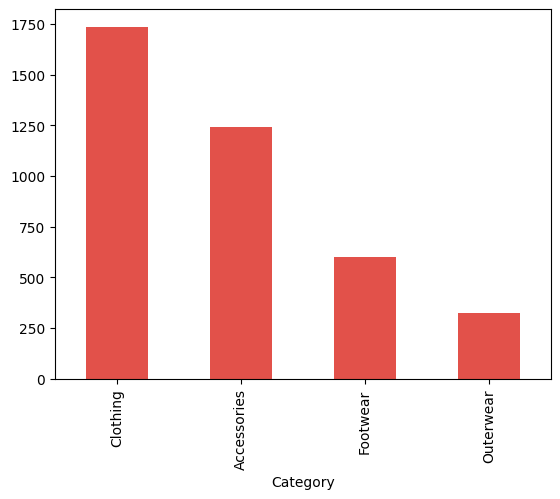

In [7]:
shopping_behavior['Category'].value_counts().plot(kind='bar')

<Axes: xlabel='Season'>

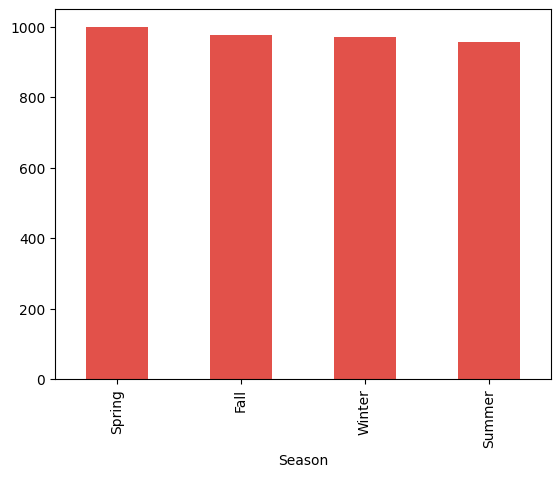

In [8]:
shopping_behavior['Season'].value_counts().plot(kind='bar')

<Axes: xlabel='Payment Method'>

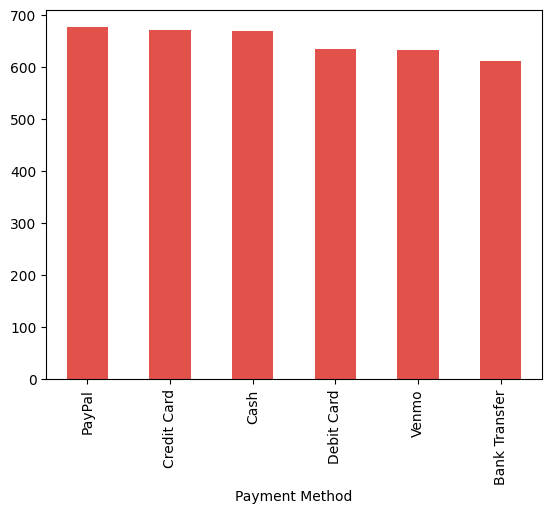

In [9]:
shopping_behavior['Payment Method'].value_counts().plot(kind='bar')

From a first glance the distribution seems fairly even. To dig deeper, we can try to

1. Perform a custom sort the payment methods, or
2. Categorize the payment methods

Sometimes, we may need to group the data we have for our analysis. Let's try Item 2 this out for Payment Methods.

We will create a new column in Pandas called 'Payment Category'.

<Axes: xlabel='Payment Category'>

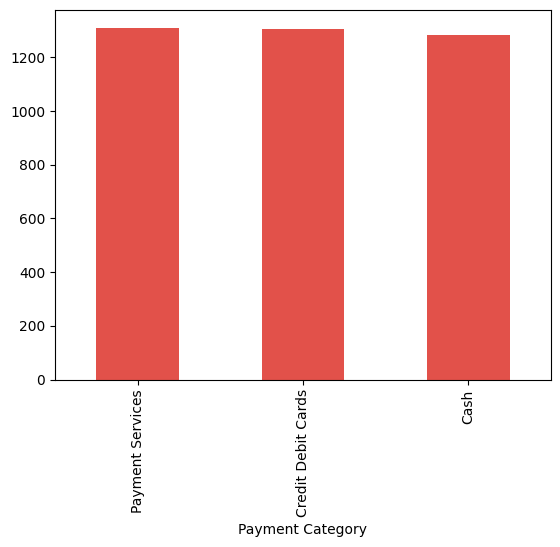

In [10]:
shopping_behavior['Payment Category'] = ''
shopping_behavior.loc[shopping_behavior['Payment Method'].isin(['Credit Card', 'Debit Card'])   ,'Payment Category'] = 'Credit Debit Cards'
shopping_behavior.loc[shopping_behavior['Payment Method'].isin(['PayPal', 'Venmo'])   ,'Payment Category'] = 'Payment Services'
shopping_behavior.loc[shopping_behavior['Payment Method'].isin(['Cash', 'Bank Transfer'])   ,'Payment Category'] = 'Cash'

shopping_behavior['Payment Category'].value_counts().plot(kind='bar')

We can see the payment category is even across this dataset. This is interesting - I wouldn't have expected cash to be so much in use now.

It would have been great if we had data on the dates to help in this analysis. Unfortunately, it is not available for this current dataset.

We can take a long at the age profiles but it is hard to visualize across so many ages. Using the method we just did, let's bucket the ages into age groups for analysis.


In [11]:
shopping_behavior['Age Group'] = 0
shopping_behavior.loc[( (shopping_behavior['Age'] <= 20))    ,'Age Group'] = 'Ages 20 and below'
shopping_behavior.loc[((shopping_behavior['Age'] >= 21) & (shopping_behavior['Age'] <= 30))    ,'Age Group'] = 'Ages 21 to 30'
shopping_behavior.loc[((shopping_behavior['Age'] >= 31) & (shopping_behavior['Age'] <= 40))    ,'Age Group'] = 'Ages 31 to 40'
shopping_behavior.loc[((shopping_behavior['Age'] >= 41) & (shopping_behavior['Age'] <= 50))    ,'Age Group'] = 'Ages 41 to 50'
shopping_behavior.loc[((shopping_behavior['Age'] >= 51) & (shopping_behavior['Age'] <= 60))    ,'Age Group'] = 'Ages 51 to 60'
shopping_behavior.loc[((shopping_behavior['Age'] > 60)) ,'Age Group'] = 'Ages above 60'
shopping_behavior['Age Group'].value_counts()

Age Group
Ages 51 to 60        753
Ages 41 to 50        750
Ages 21 to 30        737
Ages 31 to 40        725
Ages above 60        723
Ages 20 and below    212
Name: count, dtype: int64

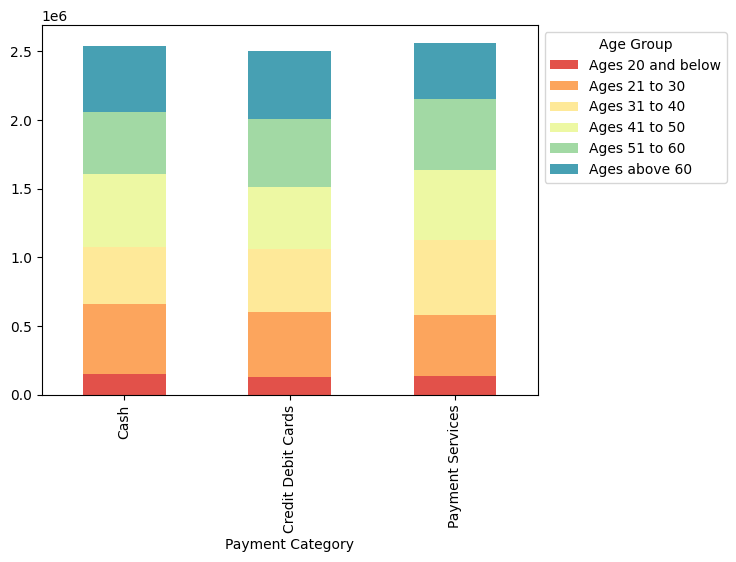

In [12]:
ax = shopping_behavior.groupby(['Payment Category', 'Age Group'])['Customer ID'].sum().unstack(1).plot(kind='bar', stacked=True)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

### Pause here

I am actually surprised by this - I wonder if the dataset is real-world data or created dummy data. I have sent a note to the author and waiting to hear back.

Am not super disturbed either way - the analysis methods still holds. I am now just curious :)


Let's carry on.

<Axes: xlabel='Shipping Type'>

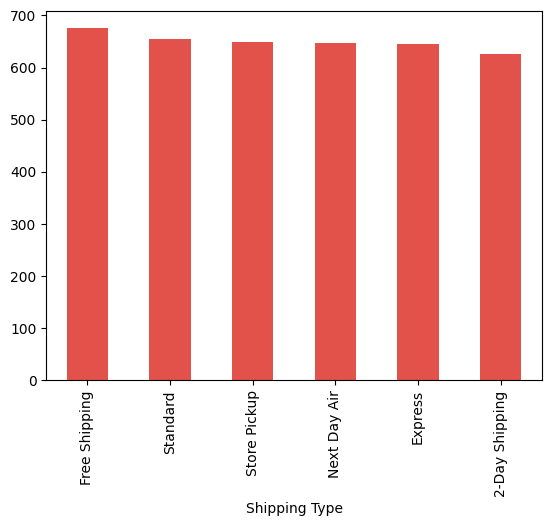

In [13]:
shopping_behavior['Shipping Type'].value_counts().plot(kind='bar')

Does the season affect the shopping type?

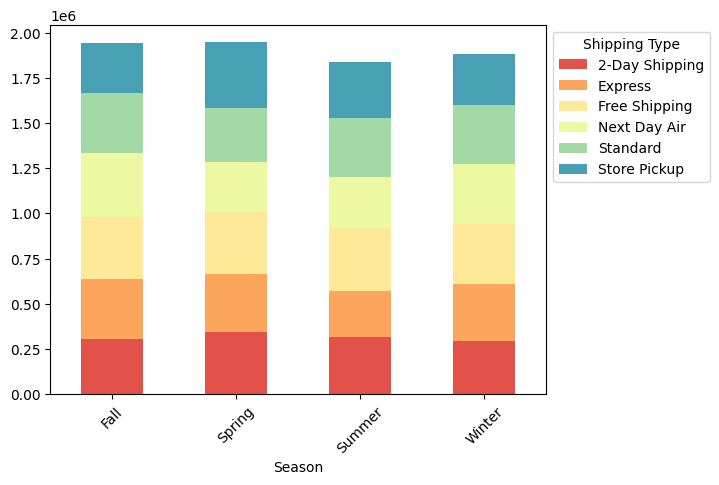

In [14]:
ax = shopping_behavior.groupby(['Season', 'Shipping Type'])['Customer ID'].sum().unstack(1).plot(kind='bar', stacked=True, rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

This looks better but it's messy. We will need to order both the Seasons and Shipping Type for a better picture.

In this case, they are both categoricals so the default sorting is alphabetically. To order them to aid in our analysis, we will need to do the following:

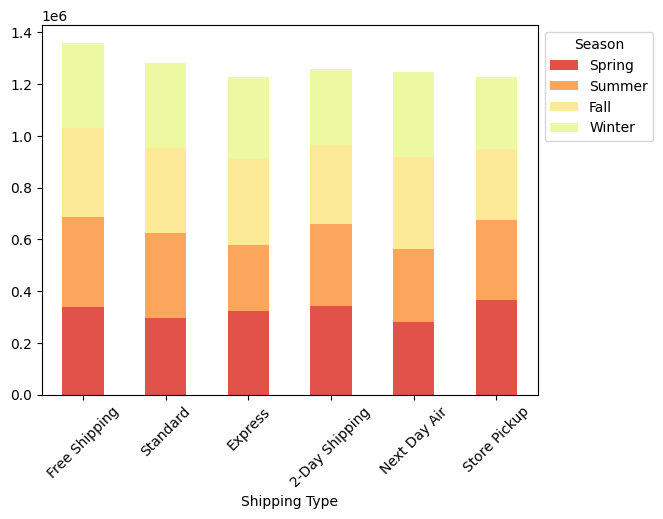

In [15]:
season = CategoricalDtype(['Spring', 'Summer', 'Fall', 'Winter'], ordered=True)
shopping_behavior['Season'] = shopping_behavior['Season'].astype(season)

shipping_type = CategoricalDtype(['Free Shipping', 'Standard', 'Express', 
                                  '2-Day Shipping', 'Next Day Air',
                                  'Store Pickup'], ordered=True)
shopping_behavior['Shipping Type'] = shopping_behavior['Shipping Type'].astype(shipping_type)

ax = shopping_behavior.groupby(['Shipping Type','Season'])['Customer ID'].sum().unstack(1).plot(kind='bar', stacked=True, rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))


Much better. But these are just value counts. Will we get a better picture if we analyze from consumer dollars spend?



Text(0, 0.5, 'Purchase Amount (USD)')

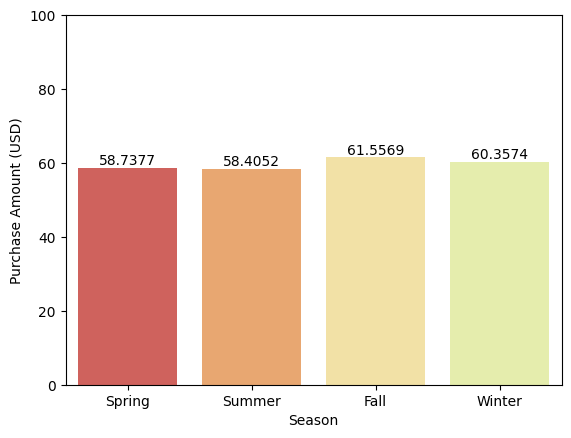

In [16]:
plt.ylim([0,100])
ax =sns.barplot(x = shopping_behavior['Season'], y = shopping_behavior['Purchase Amount (USD)'], errorbar = None)
ax.bar_label(ax.containers[0])
plt.xlabel("Season")
plt.ylabel("Purchase Amount (USD)")

In [17]:
shopping_behavior.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


Text(0, 0.5, 'Purchase Amount (USD)')

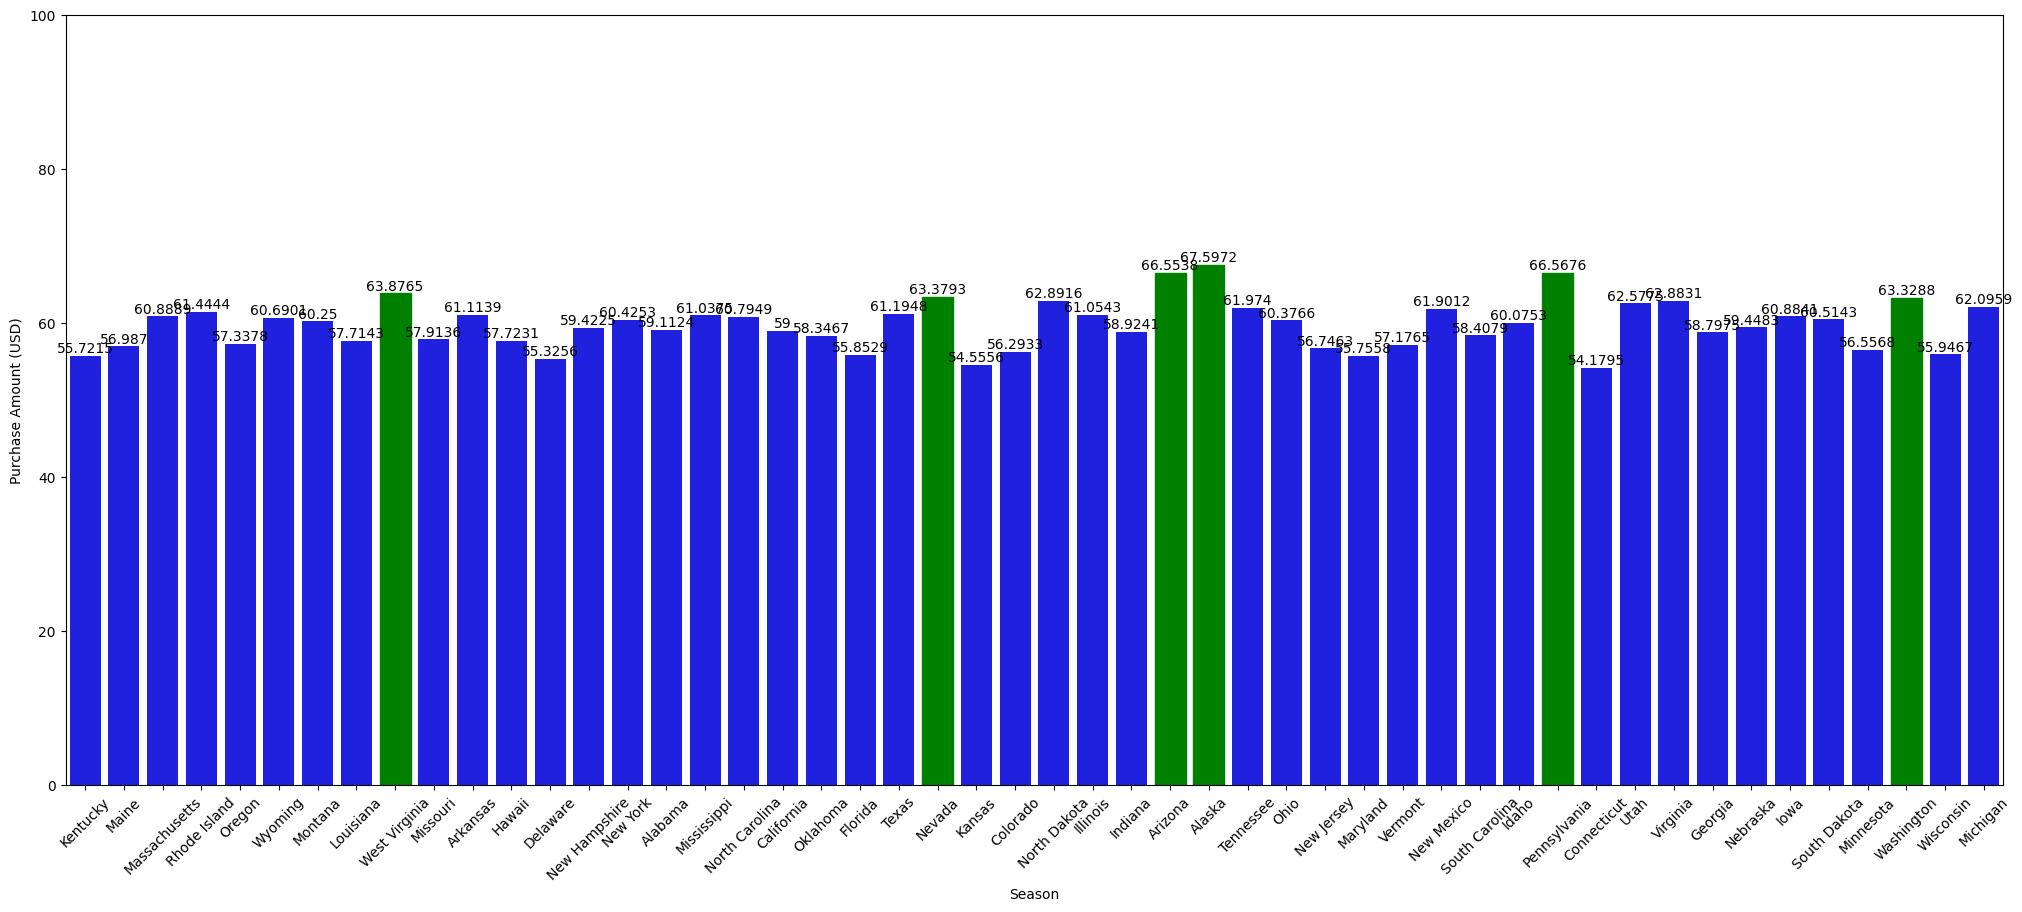

In [18]:
plt.figure(figsize=(25,10))
plt.ylim([0,100])
ax =sns.barplot(x = shopping_behavior['Location'], y = shopping_behavior['Purchase Amount (USD)'], errorbar = None, color = 'blue')
for bar in ax.patches:
    if bar.get_height() > 63:
        bar.set_color('green')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=45)
plt.xlabel("Season")
plt.ylabel("Purchase Amount (USD)")

Text(0, 0.5, 'Purchase Amount (USD)')

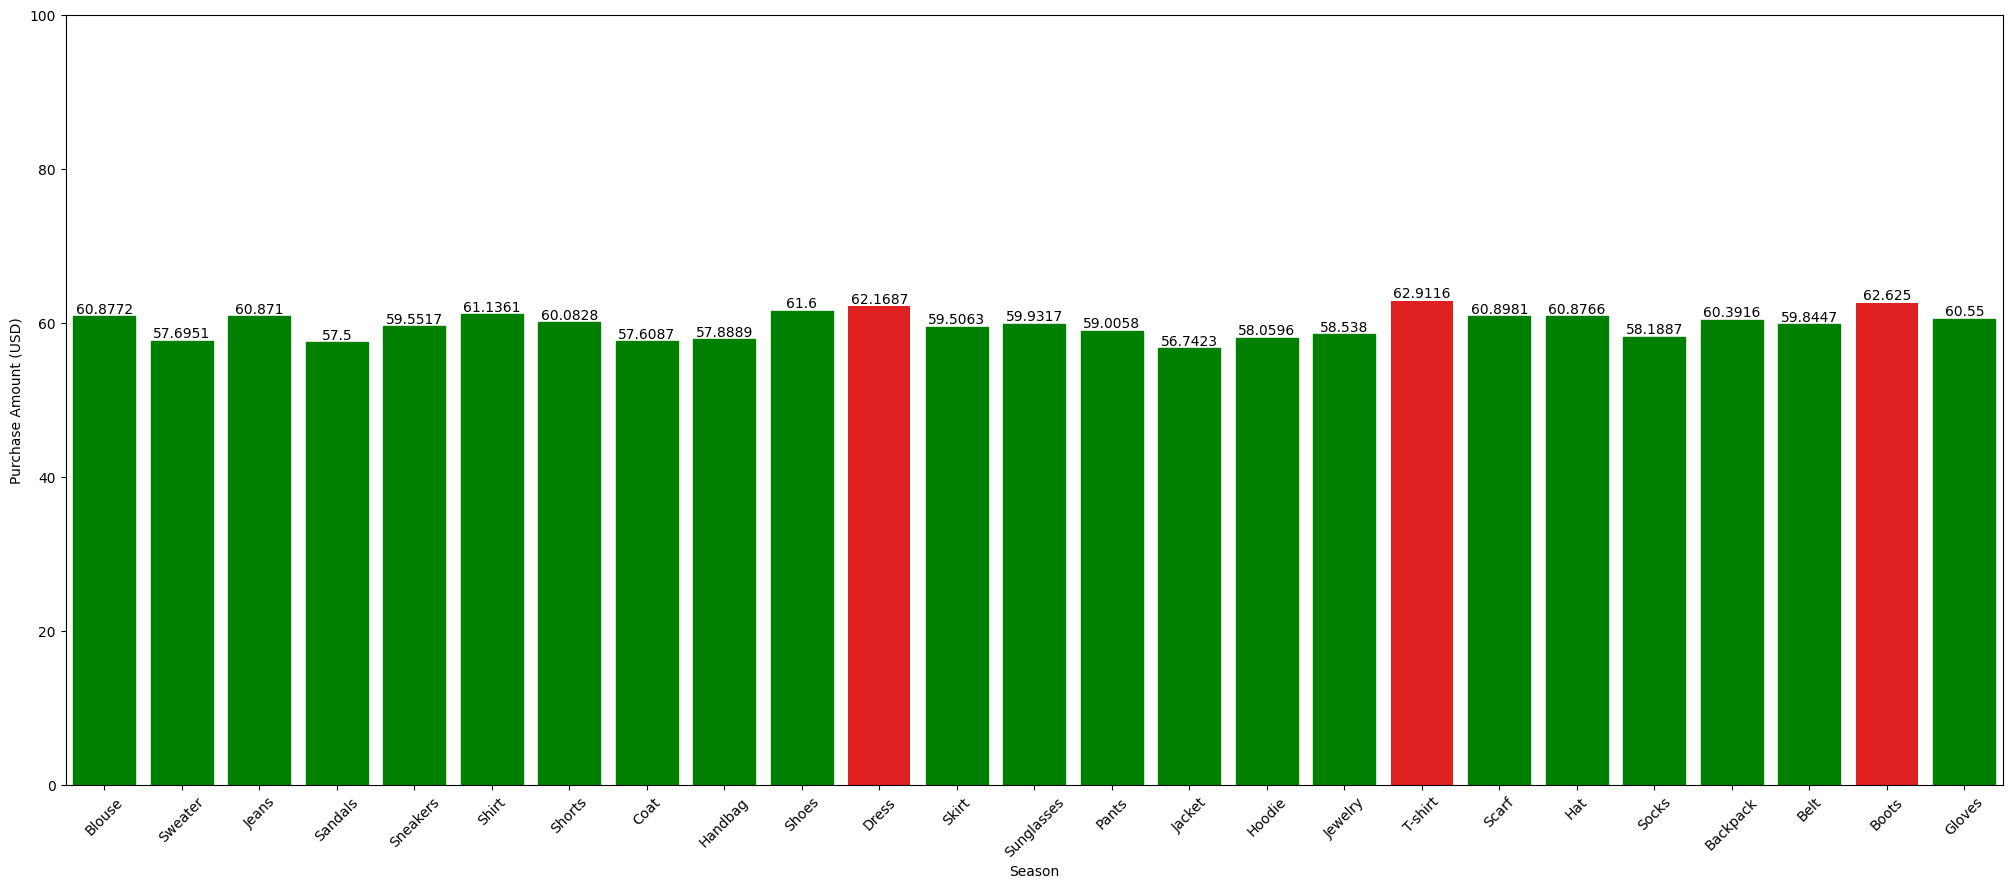

In [19]:
## average value

plt.figure(figsize=(25,10))
plt.ylim([0,100])
ax =sns.barplot(x = shopping_behavior['Item Purchased'], y = shopping_behavior['Purchase Amount (USD)'], errorbar = None, color = 'red')
for bar in ax.patches:
    if bar.get_height() < 62:
        bar.set_color('green')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=45)
plt.xlabel("Season")
plt.ylabel("Purchase Amount (USD)")

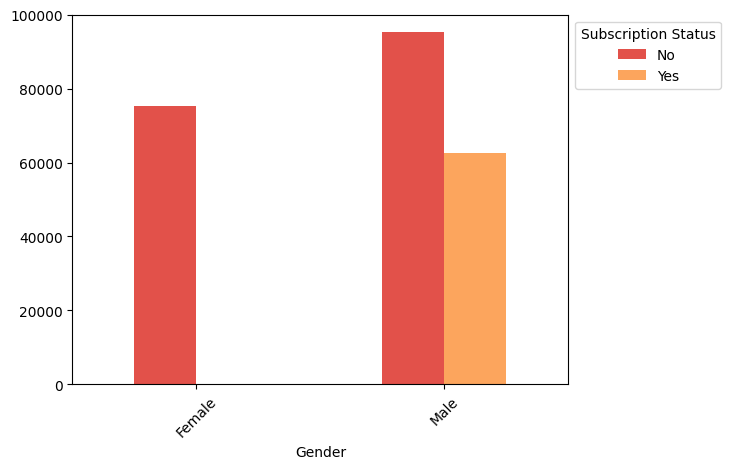

In [20]:
ax = shopping_behavior.groupby(['Gender', 'Subscription Status'])['Purchase Amount (USD)'].sum().unstack(1).plot.bar(rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

This is actually interesting. I wasn't quite expecting this result :)

Let's dig more into this similar issue to uncover if there are any accompanying trends

In [21]:
## discount and coupon codes
shopping_behavior['Discount Applied'].value_counts()

Discount Applied
No     2223
Yes    1677
Name: count, dtype: int64

In [22]:
shopping_behavior['Promo Code Used'].value_counts()

Promo Code Used
No     2223
Yes    1677
Name: count, dtype: int64

In [23]:
shopping_behavior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Customer ID             3900 non-null   int64   
 1   Age                     3900 non-null   int64   
 2   Gender                  3900 non-null   object  
 3   Item Purchased          3900 non-null   object  
 4   Category                3900 non-null   object  
 5   Purchase Amount (USD)   3900 non-null   int64   
 6   Location                3900 non-null   object  
 7   Size                    3900 non-null   object  
 8   Color                   3900 non-null   object  
 9   Season                  3900 non-null   category
 10  Review Rating           3900 non-null   float64 
 11  Subscription Status     3900 non-null   object  
 12  Shipping Type           3900 non-null   category
 13  Discount Applied        3900 non-null   object  
 14  Promo Code Used         

In [24]:
shopping_behavior['Discount Promo Codes'] = 'Yes'

shopping_behavior.loc[(shopping_behavior['Discount Applied']=='Yes')| (shopping_behavior['Promo Code Used']=='Yes'),'Discount Promo Codes'] = 'No'

shopping_behavior['Discount Promo Codes'].value_counts()

Discount Promo Codes
Yes    2223
No     1677
Name: count, dtype: int64

In this case, Discount Applied and Promo Code Used refer to the same thing but they may not. We may choose to perform some logic which I have done in the above to be scalable. Otherwise to simplify things, we may wish to drop 1 redundant column.  It really depends on the context and dataset.

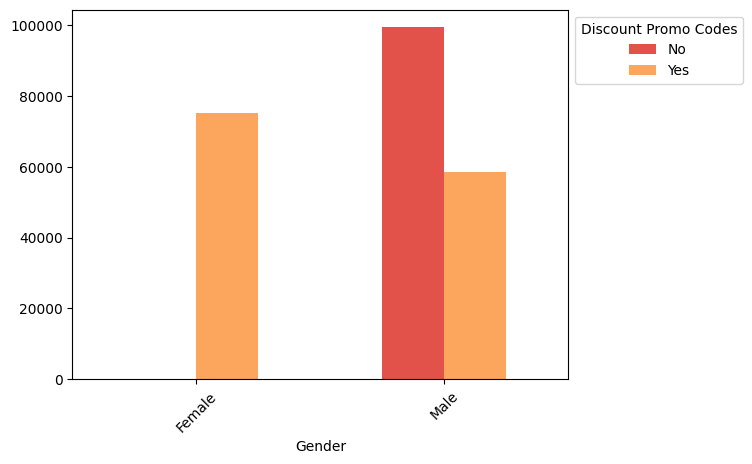

In [25]:
ax = shopping_behavior.groupby(['Gender', 'Discount Promo Codes'])['Purchase Amount (USD)'].sum().unstack(1).plot.bar(rot=45)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

Wow! The results are now reversed! :)

In [26]:
crosstab_res = pd.crosstab(index=shopping_behavior['Discount Promo Codes'],columns = shopping_behavior['Subscription Status'])
crosstab_res

Subscription Status,No,Yes
Discount Promo Codes,,
No,624,1053
Yes,2223,0


In [27]:
from scipy.stats import chi2_contingency

# Performing Chi-sq test
chisq_res = chi2_contingency(crosstab_res)

# P-Value is the Probability of H0 being True
# If P-Value > 0.05 then only we Accept the assumption(H0)

print('The P-Value of the Chi Sq Test is:', chisq_res[1])

The P-Value of the Chi Sq Test is: 0.0


The H0 used in the Chi-square test means he variables are not correlated with each other. Since the P-value is zero, H0 will NOT be accepted - this means 'Discount Promo Codes' is highly correlated to 'Subscription Status', which makes sense as regular subcribers may already enjoy a subscription incentive and have no need (or probably not eligible) to stack on any other discounts or promo codes.

Let's look at the bigger picture for overall correlation

In [28]:
col_type = shopping_behavior.dtypes
col_names = list(shopping_behavior)

cat_var_index = [i for i, x in enumerate(col_type) if ((x == 'object')|(x == 'string')|(x == 'category'))]

cat_var_name = [x for i, x in enumerate(col_names) if i in cat_var_index]

cat_var_df = pd.DataFrame({'cat_ind': cat_var_index, 
                           'cat_name': cat_var_name})


## Here are the different columns to be transformed
cat_var_df


,cat_ind,cat_name
0,2,Gender
1,3,Item Purchased
2,4,Category
3,6,Location
4,7,Size
5,8,Color
6,9,Season
7,11,Subscription Status
8,12,Shipping Type
9,13,Discount Applied


In [29]:
label_list = []
cat_list = cat_var_df.loc[:, 'cat_name']

shopping_behavior_vector = shopping_behavior.copy()

for index, cat_feature in enumerate(cat_list): 

    le = LabelEncoder()

    le.fit(shopping_behavior_vector.loc[:, cat_feature])    
    label_list.append(list(le.classes_))

    shopping_behavior_vector.loc[:, cat_feature] = le.transform(shopping_behavior_vector.loc[:, cat_feature])
    
shopping_behavior_vector = shopping_behavior_vector.convert_dtypes()
shopping_behavior_vector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   Int64  
 1   Age                     3900 non-null   Int64  
 2   Gender                  3900 non-null   Int64  
 3   Item Purchased          3900 non-null   Int64  
 4   Category                3900 non-null   Int64  
 5   Purchase Amount (USD)   3900 non-null   Int64  
 6   Location                3900 non-null   Int64  
 7   Size                    3900 non-null   Int64  
 8   Color                   3900 non-null   Int64  
 9   Season                  3900 non-null   Int64  
 10  Review Rating           3900 non-null   Float64
 11  Subscription Status     3900 non-null   Int64  
 12  Shipping Type           3900 non-null   Int64  
 13  Discount Applied        3900 non-null   Int64  
 14  Promo Code Used         3900 non-null   

We can see the shopping_behavior_vector is now properly vectorized and we may perform more operations and analysis on it that we couldn't previously with the object / category data types.

<Axes: >

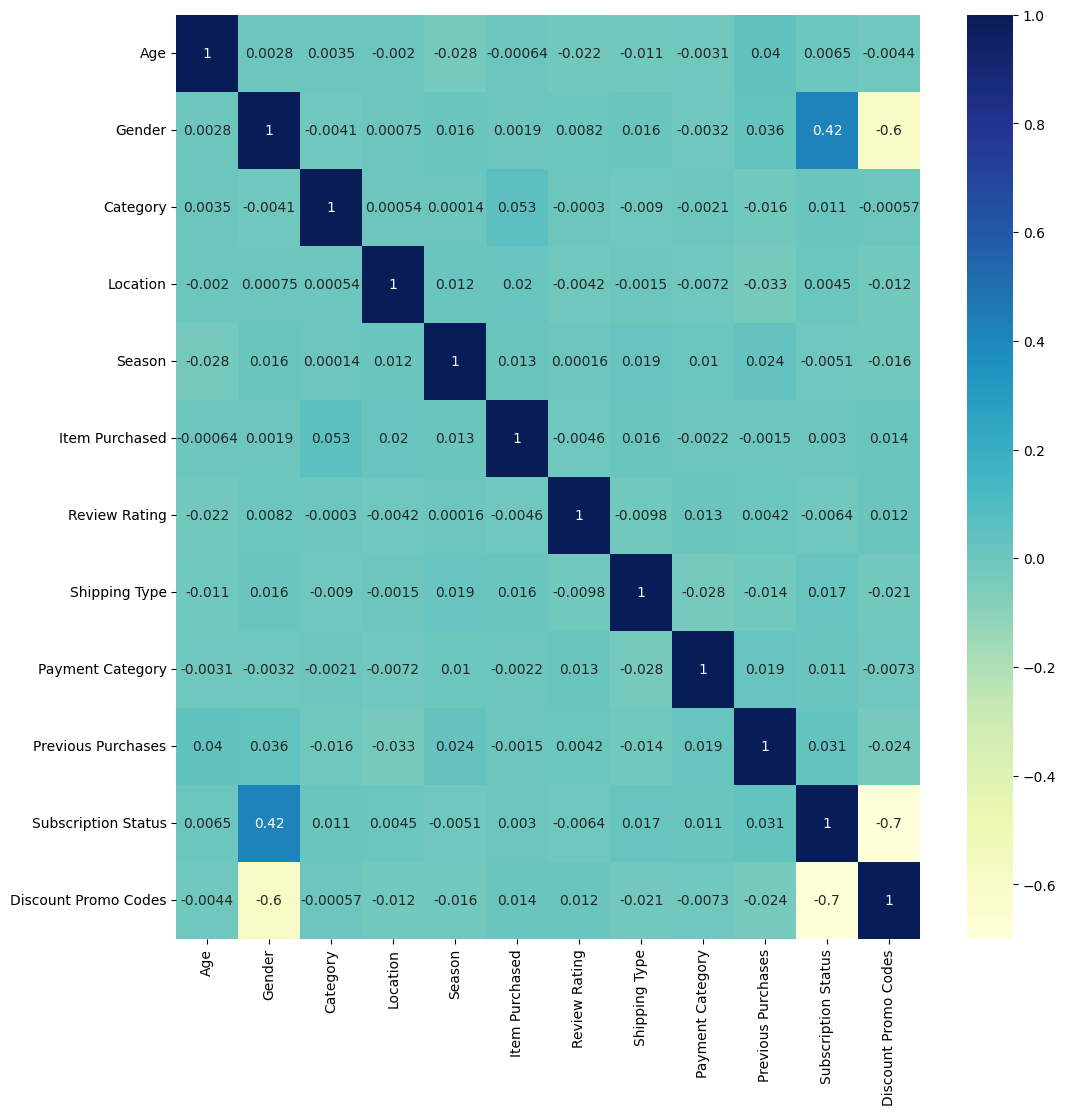

In [30]:
## zoom in on key attributes
plt.figure(figsize=(12,12))
shopping_behavior_vector_corr = shopping_behavior_vector[['Age', 'Gender', 'Category','Location', 'Season', 'Item Purchased', 'Review Rating', 'Shipping Type', 'Payment Category', 'Previous Purchases', 'Subscription Status', 'Discount Promo Codes' ]]
sns.heatmap(shopping_behavior_vector_corr.corr(), cmap="YlGnBu", annot=True)

We can see there isnt much correlation between the factors except for the Gender, and Discount Promo Codes and subscription Status which we had seen previously.

Moving on lets analyze types of shopping in seasons in dollar amounts.

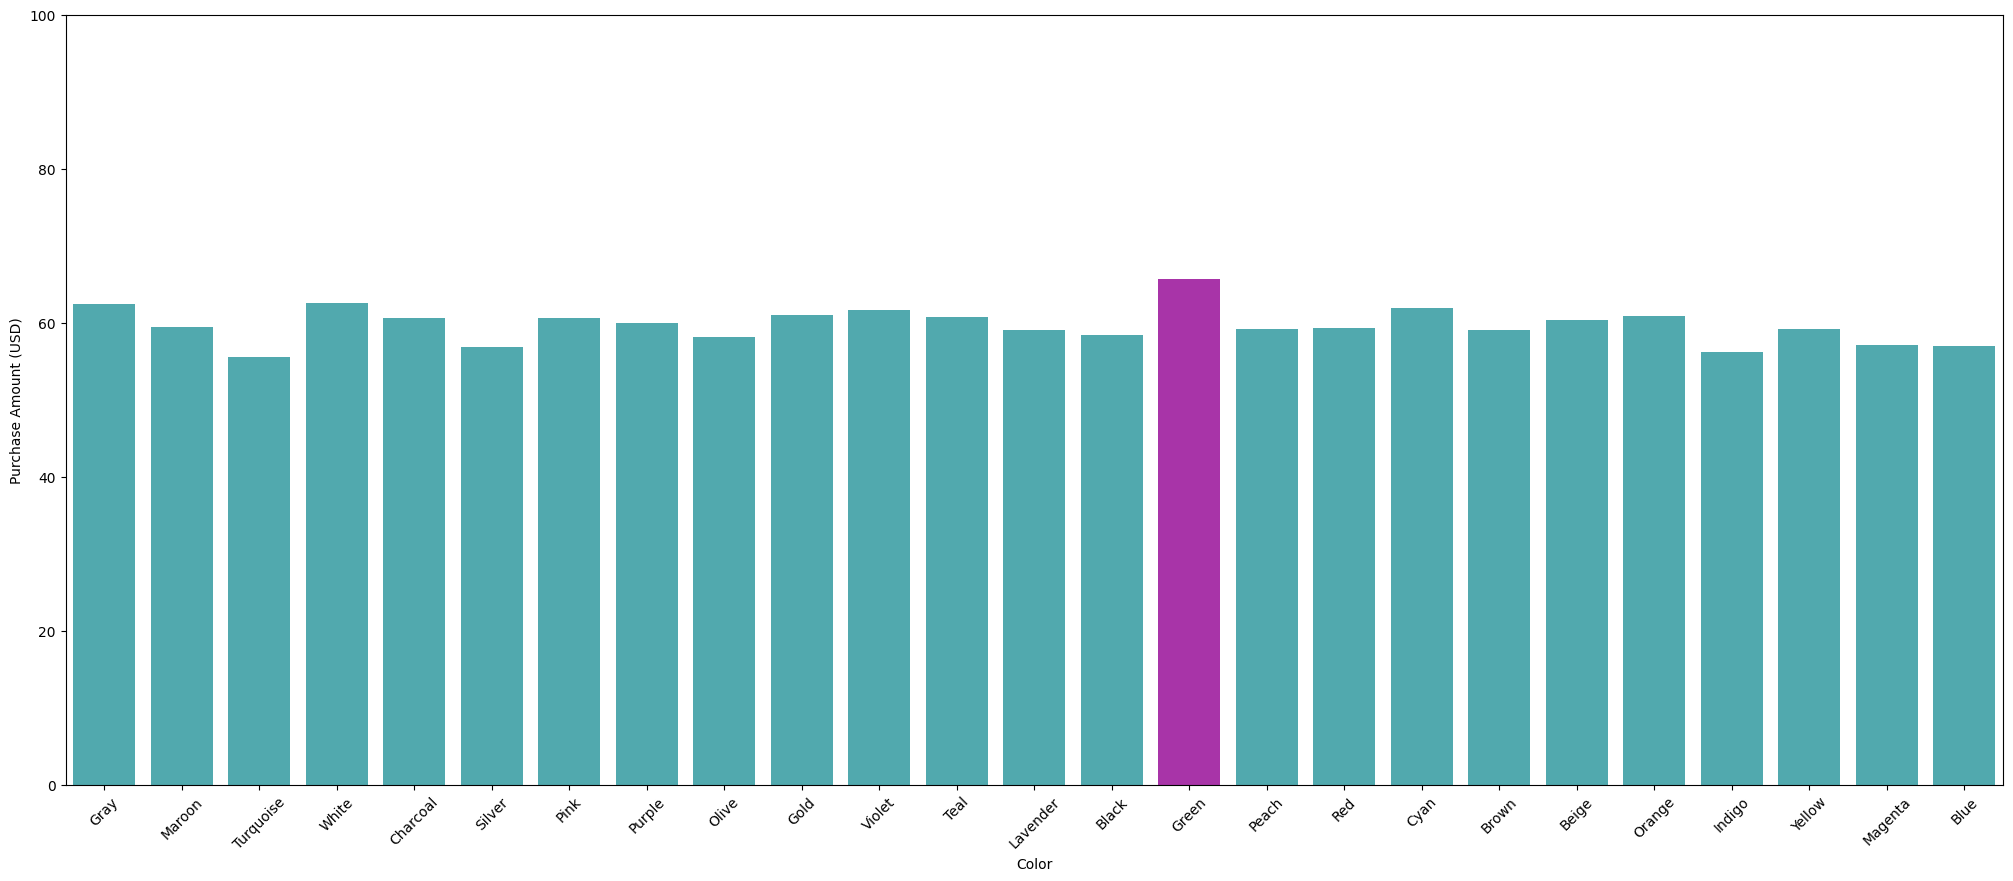

In [31]:
plt.figure(figsize=(25,10))
plt.ylim([0,100])

ax =sns.barplot(x = shopping_behavior['Color'], y = shopping_behavior['Purchase Amount (USD)'],  errorbar = None, color='#42b7bd')
ax.tick_params(axis='x', labelrotation=45)
plt.xlabel("Color")
plt.ylabel("Purchase Amount (USD)")


# visualize top color
patch_h = [patch.get_height() for patch in ax.patches]   
idx_tallest = np.argmax(patch_h)   
ax.patches[idx_tallest].set_facecolor('#a834a8')  



Green is the top color by spending!


[Text(0, 0, '3.68363'),
 Text(0, 0, '3.76707'),
 Text(0, 0, '3.64839'),
 Text(0, 0, '3.84125'),
 Text(0, 0, '3.75793'),
 Text(0, 0, '3.62959'),
 Text(0, 0, '3.71146'),
 Text(0, 0, '3.73043'),
 Text(0, 0, '3.77516'),
 Text(0, 0, '3.74733'),
 Text(0, 0, '3.75482'),
 Text(0, 0, '3.78228'),
 Text(0, 0, '3.74472'),
 Text(0, 0, '3.71871'),
 Text(0, 0, '3.76319'),
 Text(0, 0, '3.71921'),
 Text(0, 0, '3.75614'),
 Text(0, 0, '3.78299'),
 Text(0, 0, '3.7'),
 Text(0, 0, '3.80649'),
 Text(0, 0, '3.75094'),
 Text(0, 0, '3.75245'),
 Text(0, 0, '3.76149'),
 Text(0, 0, '3.8125'),
 Text(0, 0, '3.86429')]

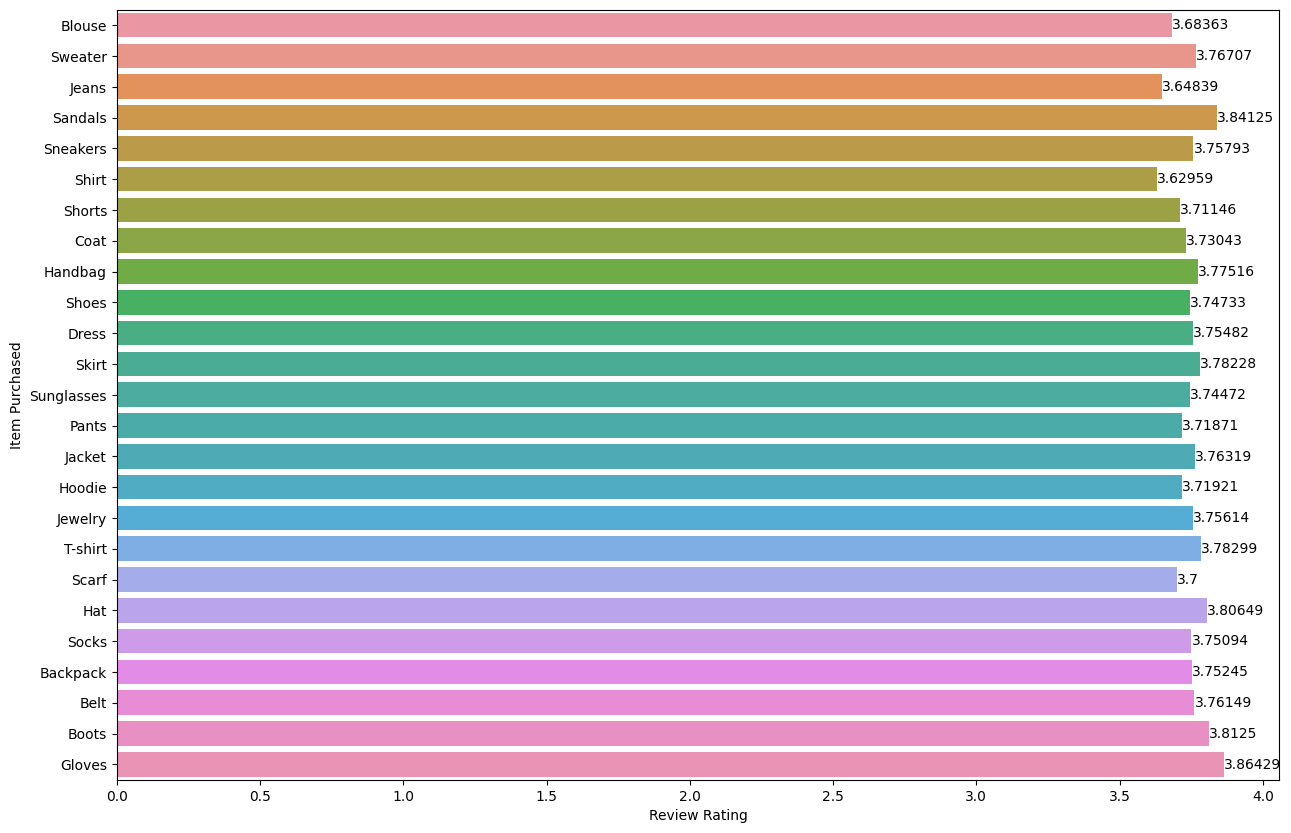

In [32]:
plt.figure(figsize=(15,10))
plt.ylim([0,100])
plot13 = sns.barplot(x =shopping_behavior['Review Rating'], y = shopping_behavior['Item Purchased'],errorbar = None)
plot13.bar_label(plot13.containers[0])

[Text(0, 0, '3.72314'),
 Text(0, 0, '3.79065'),
 Text(0, 0, '3.74691'),
 Text(0, 0, '3.76863')]

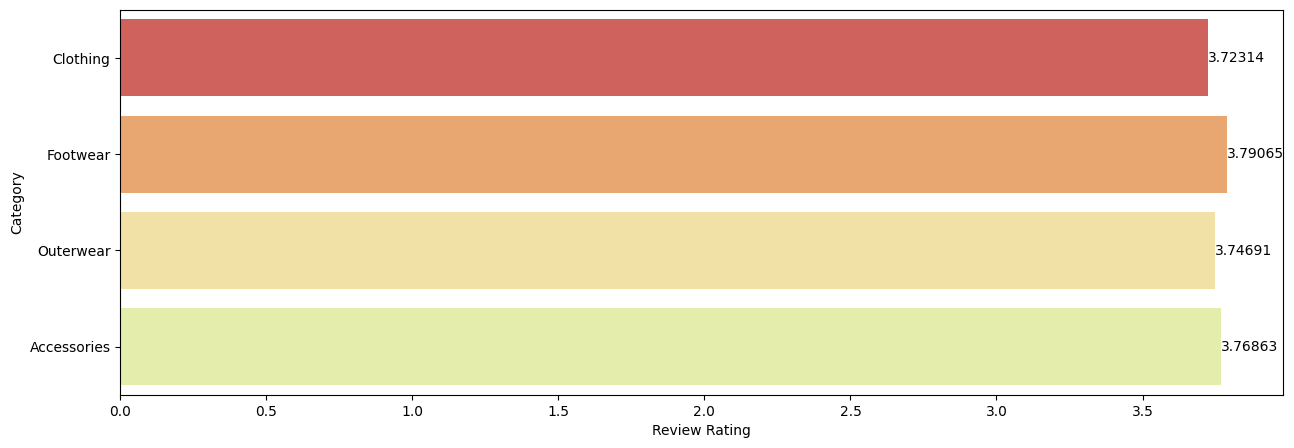

In [33]:
plt.figure(figsize=(15,5))
plt.ylim([0,100])
plot13 = sns.barplot(x =shopping_behavior['Review Rating'], y = shopping_behavior['Category'],errorbar = None)
plot13.bar_label(plot13.containers[0])

<Axes: xlabel='Item Purchased'>

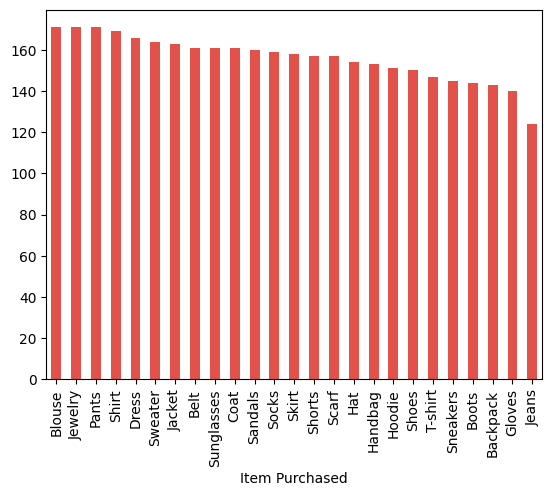

In [34]:
shopping_behavior['Item Purchased'].value_counts().plot(kind='bar')

Text(0, 0.5, 'Purchase Amount (USD)')

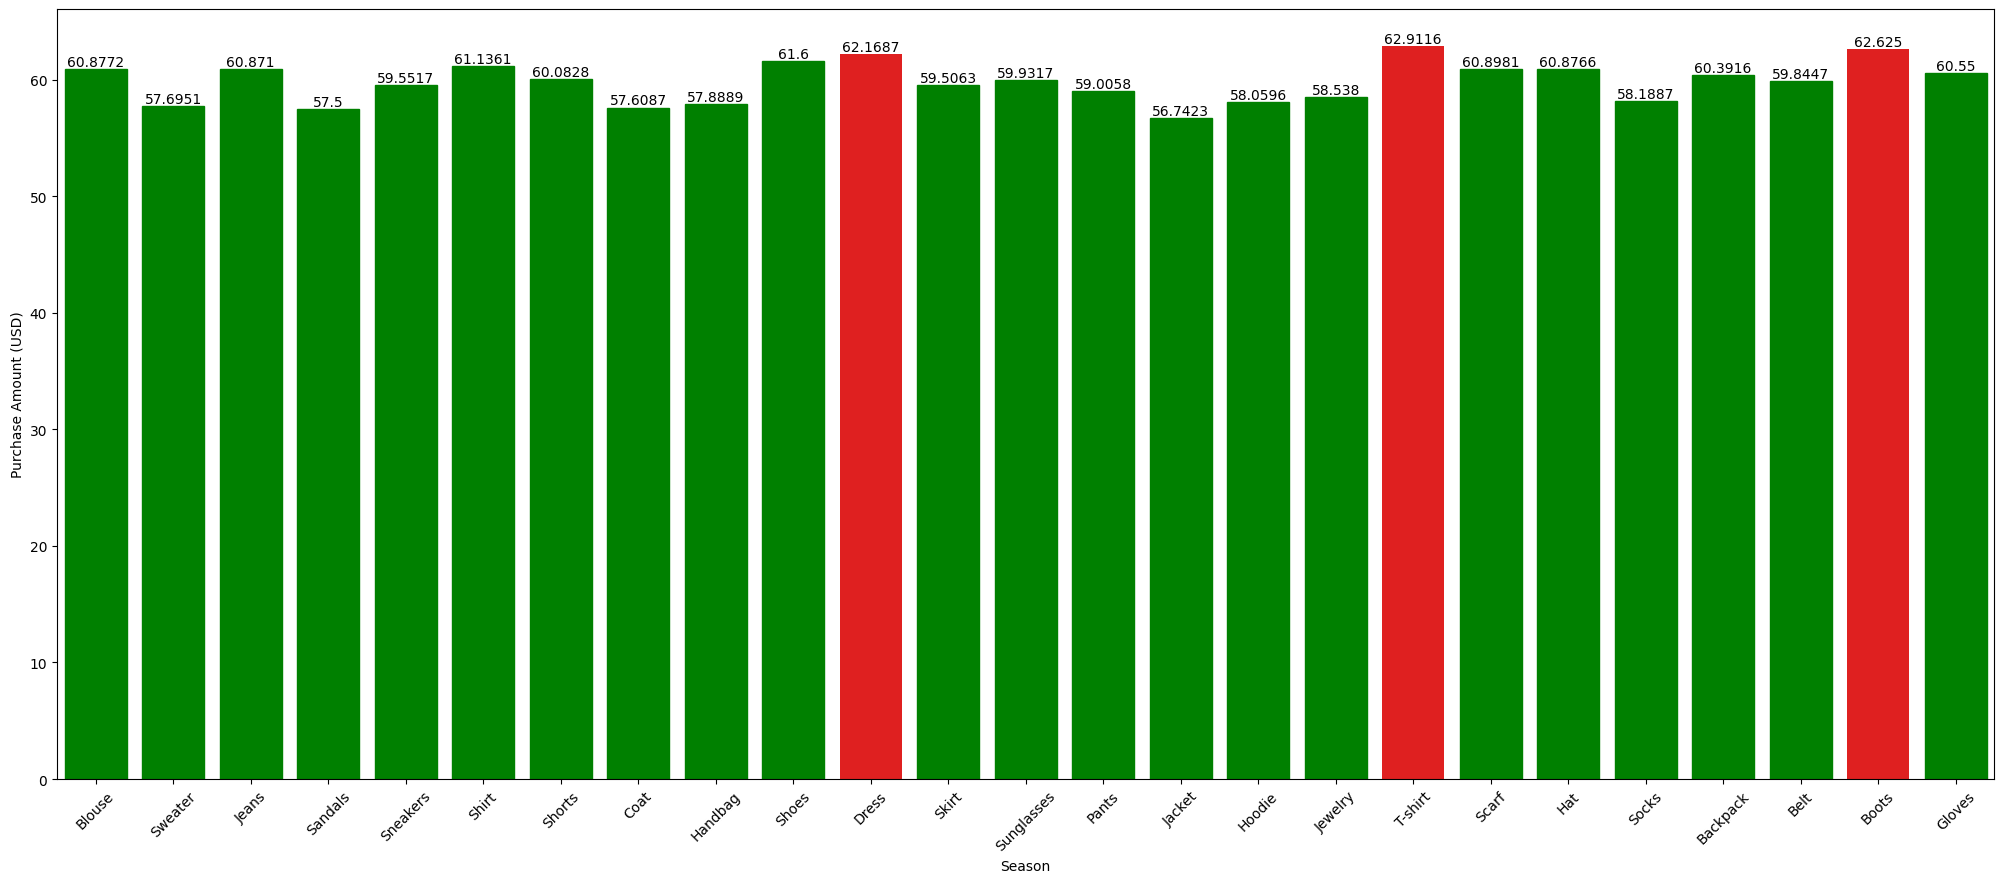

In [35]:
## average spending across items

plt.figure(figsize=(25,10))
ax =sns.barplot(x = shopping_behavior['Item Purchased'], y = shopping_behavior['Purchase Amount (USD)'], errorbar = None, color = 'red')
for bar in ax.patches:
    if bar.get_height() < 62:
        bar.set_color('green')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=45)
plt.xlabel("Season")
plt.ylabel("Purchase Amount (USD)")


Text(0, 0.5, 'Purchase Amount (USD)')

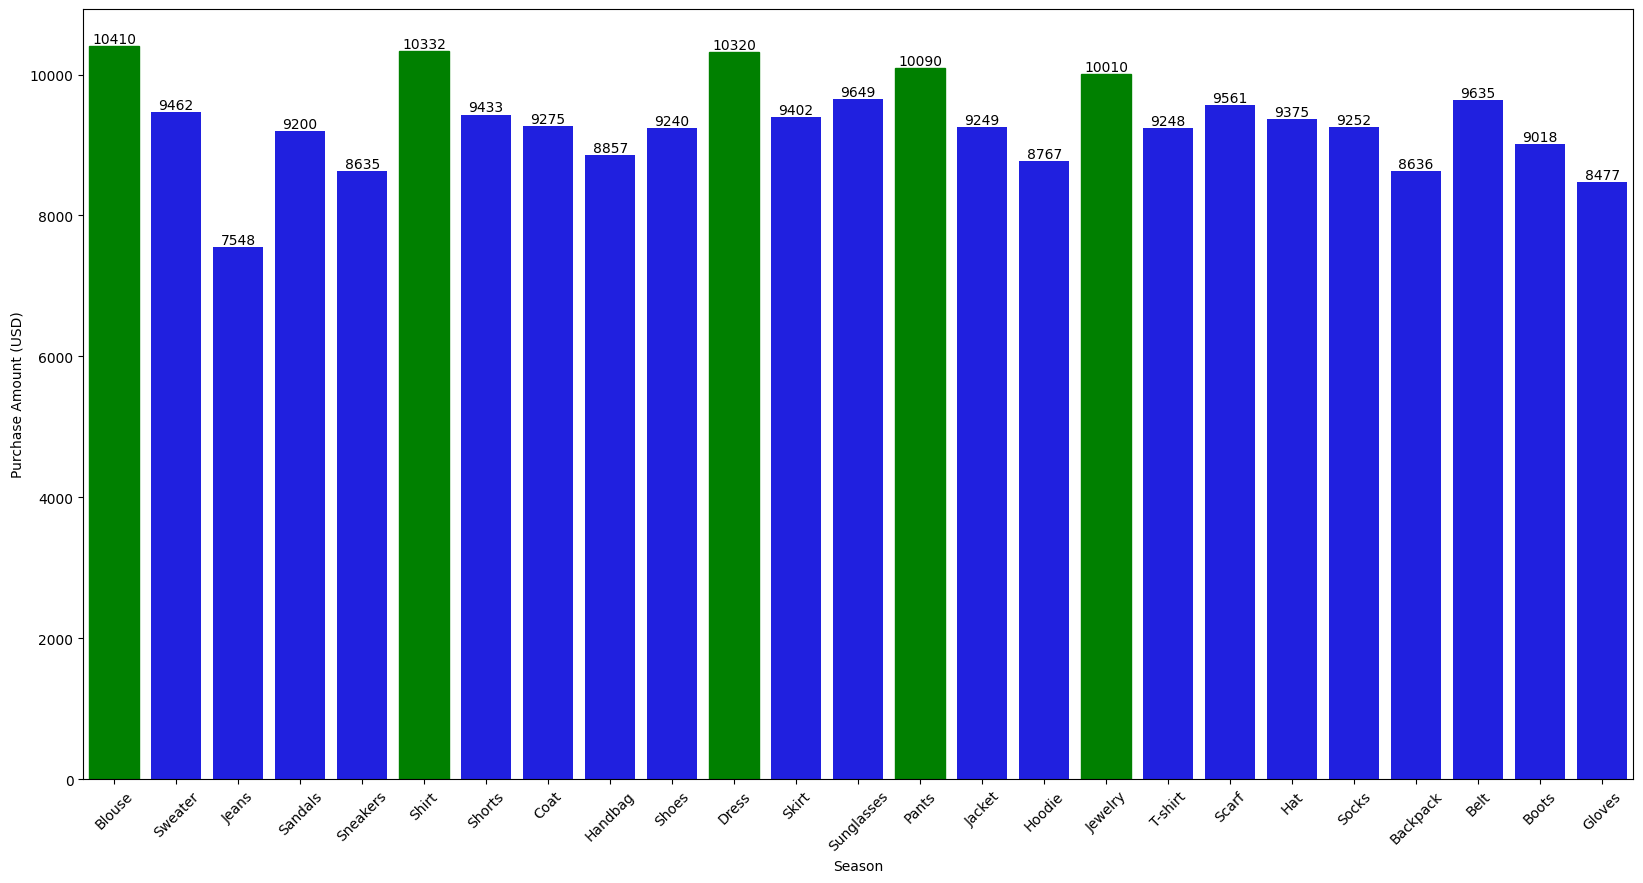

In [36]:
## total spending across items

plt.figure(figsize=(20,10))
ax =sns.barplot(x = shopping_behavior['Item Purchased'], y = shopping_behavior['Purchase Amount (USD)'], errorbar = None, color = 'blue', estimator=sum)
for bar in ax.patches:
    if bar.get_height() > 10000:
        bar.set_color('green')
ax.bar_label(ax.containers[0])
ax.tick_params(axis='x', labelrotation=45)
plt.xlabel("Season")
plt.ylabel("Purchase Amount (USD)")


## Conclusion

There you have it. We have successfully explored a dataset, cleaned it, performed some analysis with some visualizations. 

In it we drew some insights but also questions. This concludes this example - hope you enjoyed it!